# 人脸识别算法--非深度方法

在前深度学习时代，非深度的方法探索了不同的人脸识别算法。

先考虑一下非深度学习时代，人脸识别难在哪？或者说目标识别的难点在哪？

图像是一个高度冗余的数据。

    * 图像数据中包含大量与语义无关的内容
    
    * 图像数据中还包含大量噪声
    
所有的图像识别算法，都是在解决这个问题。

也就是说，如何从冗余的数据中，提取出关键的信息。

深度学习通过不断的卷积，越来越多的通道数量，以及大量的参数解决这个问题。

非深度方法如何处理？

## PCA(主成分分析)

**动机**：

    - 将高维特征映射到低维特征，减少计算复杂度和存储空间
    - 从数据中提取最相关信息

**问题定义**：

将一个n维数据，映射到k维上。

**基本思想**：

什么才是最不冗余的坐标轴？

只有正交的坐标轴，才是最不冗余的。

因此，PCA的工作就是从原始空间中，顺序的找到一组组正交的坐标轴

例如，第一个坐标轴的选择，是原始数据中，方差最大的方向；

第二个坐标轴是与第一个坐标轴正交的平面中，方差最大的；依次类推。

最终，可以得到n个坐标轴。

我们可以发现一个问题：大部分的方差都集中在某几个维度中，其余维度的方差几乎没有。

因此，舍弃m个轴，保留方差最大的k个轴，从而实现对数据的降维。

**问题**：

如何得到包含最大差异的主成分方向？

**协方差矩阵**

首先，给定一组数据

$$x=\{x_1, x_2, ..., x_n\}$$

其均值可表示为

$$\bar{x}=\frac{1}{n}\sum_i^nx_i$$

进而，可以得到方差为

$$S^2 = \frac{1}{n-1}\sum_i^n(x_i-\bar x)^2$$

协方差可表示为

$$\text{Cov}(X, Y)=E[(X-E(X))(Y-E(Y))]=\frac{1}{n}\sum_i^n(x_i-\bar{x})(y_i-\bar{y})$$

其中，

    * $x$和$y$是两个不同的一维数据，但我们可以认为是一个高维数据的两个维度。
    
    * $\text{Cov}(X, X)$即为X的方差
    
因此，对于一个高维数据，第$i$维和第$j$维的数据之间的协方差值可由上式计算得到。

那么对于一个N维数据，其协方差矩阵可以写为

$$
\text{Cov}(X_1, X_2, ..., X_n)\begin{bmatrix}
\text{Cov}(X_1, X_1) & \cdots & \text{Cov}(X_1, X_n) \\
\vdots & \ddots & \vdots \\
\text{Cov}(X_n, X_1) & \cdots & \text{Cov}(X_n, X_n) \\
\end{bmatrix}
$$


协方差矩阵中，对角线位置是描述了每个维度本身的数据差异程度，而其余点则描述了不同维度之间的数据差异程度。

那么回顾一下我们的问题：如何找出数据的最大方差的方向？

也就是说，我们要把协方差矩阵进行降复杂度，也就是说，我们把里面一些数据轴删除以后(值为零)，这个矩阵和原来看起来差距不大。

**特征值分解**

特征值分解是实现上述目标的重要手段。

如果$v$是矩阵A的特征向量，那么可表示为

$$Av=\lambda v$$

$\lambda$是特征值，$v$是一组正交的特征向量

那么对于矩阵A，有一组特征向量v，将这组向量进行正交化单位化，就能找到一组正交单位向量。

特征值分解，就是将A分解为

$$A=\Delta\Sigma\Delta^{-1}$$

其中，$\Delta$是特征向量组成的矩阵，$\Sigma$是由特征向量组成的对角矩阵。



**实现特征值分解：SVD**

步骤：

1 求$AA^\top$的特征向量，用单位化的特征向量构成$U$

2 求$A^\top A$的特征向量，用单位化的特征向量构成$V$

3 将$A^\top A$的特征值求平方根，构成$\Sigma$

**PCA的实现过程:**

给定数据$X$

1. 每一维特征减去各自平均值

2. 计算协方差矩阵. $XX^\top$

3. 特征值分解求解特征向量和特征值(可以用svd)

4. 对特征值排序，取前k个大的特征值，将对应的$k$个特征向量作为行向量组成特征矩阵P

5. 将数据转换到k个特征向量构建的新空间中


PCA的直观感受

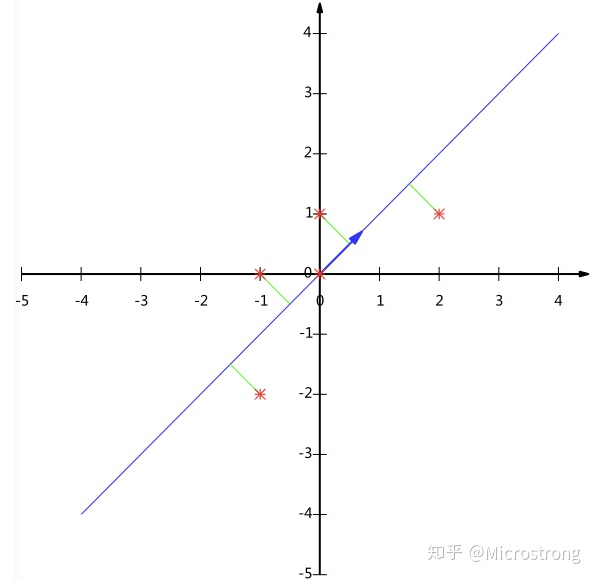

**PCA的代码实现**

In [4]:
import numpy as np

X = np.array([[-1, 1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
n_samples, n_features = X.shape
mean=np.array([np.mean(X[:,i]) for i in range(n_features)])
norm_X=X-mean

In [8]:
scatter_matrix=np.dot(np.transpose(norm_X),norm_X)
eig_val, eig_vec = np.linalg.eig(scatter_matrix)

print(eig_val)
print()
print(eig_vec)

[37.7067455   1.62658783]

[[ 0.8549662  -0.51868371]
 [ 0.51868371  0.8549662 ]]


In [13]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(n_features)]
eig_pairs.sort(reverse=True)
feature=np.array([ele[1] for ele in eig_pairs[:1]])
print(feature)

[[0.8549662  0.51868371]]


In [14]:
data=np.dot(norm_X,np.transpose(feature))
print(data)

[[-0.50917706]
 [-2.40151069]
 [-3.7751606 ]
 [ 1.20075534]
 [ 2.05572155]
 [ 3.42937146]]


opencv的使用方法
```
import cv2
pca = cv2.PCACompute(X, mean=None, maxComponents=2)
```

那么PCA和人脸识别有什么关联呢？

我们可以将人脸图像视为一个高维数据

将人脸变换到一个共同的子空间上，在这个子空间中进行识别与辨识，就能提高准确率。

本质上，PCA是一种空间变换方法。

## 特征脸人脸识别

人脸识别问题，在特征脸看来，就是一个人脸特征分布识别的问题。

首先，训练集中每一个人脸，都被认为是一个坐标轴

一个新的人脸，在每个人脸坐标轴上，都有一个投影。

在那个人脸坐标轴上投影的多，就是哪个人脸。

#### 具体步骤

1. 获取所有人的人脸图像各1张

2. 计算平均脸

    每张人脸都拉长为一个向量
    
    对应维度的向量求平均，得到一个平均向量
    
3. 计算每张图像与平均图像的差值

4. 把差值图像集合成矩阵，用pca找到n个特征向量组成矩阵P（这里可以求转置的特征向量）

5. 对于一张新人脸，进行矩阵变换，得到新的向量

6. 新的向量与所有人脸图像的差值求取距离，足够近的距离则表示人脸被识别成功。